In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
import seaborn as sns

In [9]:
df = pd.read_csv('daily-minimum-temperatures.csv',header=0,index_col=0,parse_dates=True)
df

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


In [5]:
df.describe()

,Temp
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


In [6]:
df.shape

(3650, 1)

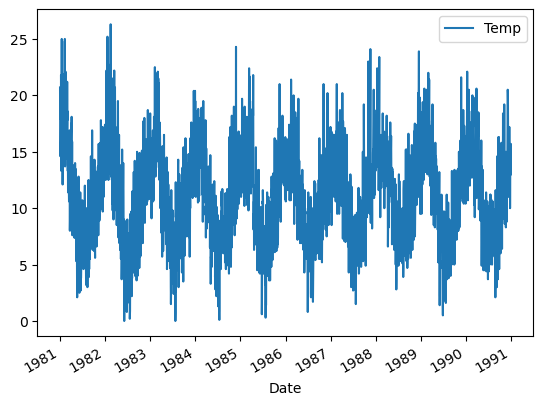

In [5]:
df.plot()
plt.show()

<Axes: ylabel='Density'>

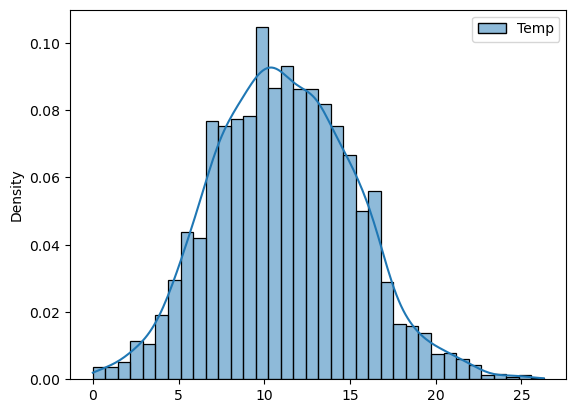

In [10]:
sns.histplot(df, kde=True, stat="density")

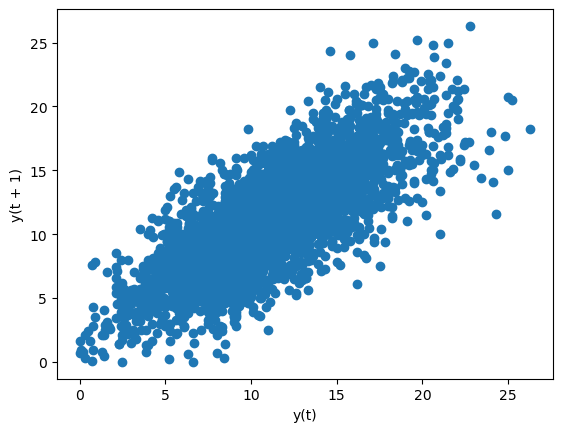

In [4]:
lag_plot(df)
plt.show()

In [6]:
from pandas import DataFrame
from pandas import concat
values = DataFrame(df.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
result = dataframe.corr()
print(result)


           t      t+1
t    1.00000  0.77487
t+1  0.77487  1.00000


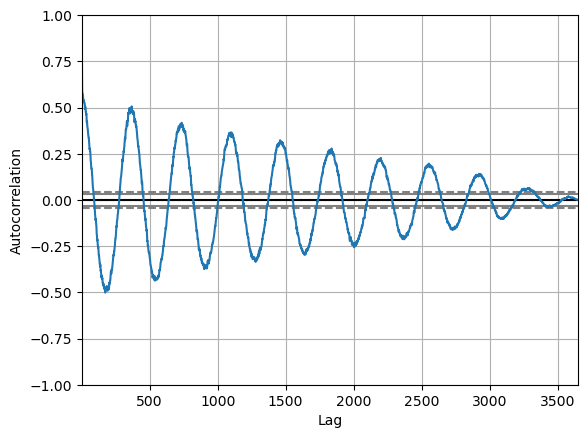

In [9]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df)
plt.show()


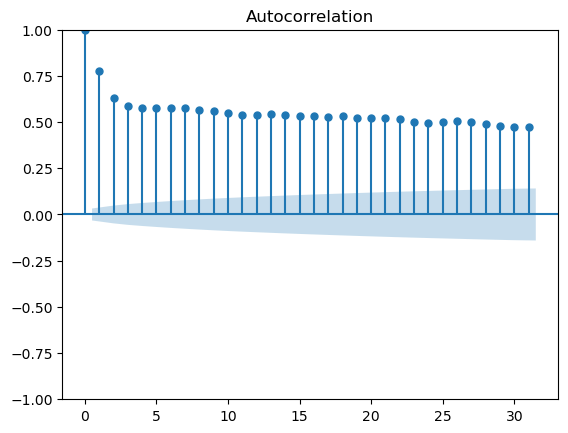

In [12]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df, lags=31)
plt.show()

Test RMSE: 1.850097


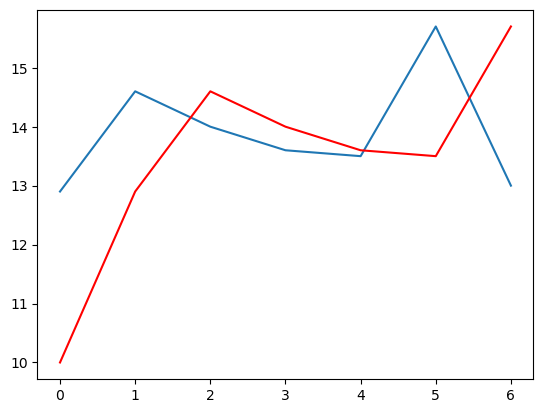

In [15]:
from sklearn.metrics import mean_squared_error
from math import sqrt
values = DataFrame(df.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
X = dataframe.values
train, test = X[1:len(X)-7], X[len(X)-7:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
def model_persistence(x):
    return x
predictions= list()
for x in test_X:
    y=model_persistence(x)
    predictions.append(y)
rmse = sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %3f'%rmse)
plt.plot(test_y)
plt.plot(predictions,color='red')
plt.show()
        


Lag(k_ar): 29
Coefficients: [ 5.57543506e-01  5.88595221e-01 -9.08257090e-02  4.82615092e-02
  4.00650265e-02  3.93020055e-02  2.59463738e-02  4.46675960e-02
  1.27681498e-02  3.74362239e-02 -8.11700276e-04  4.79081949e-03
  1.84731397e-02  2.68908418e-02  5.75906178e-04  2.48096415e-02
  7.40316579e-03  9.91622149e-03  3.41599123e-02 -9.11961877e-03
  2.42127561e-02  1.87870751e-02  1.21841870e-02 -1.85534575e-02
 -1.77162867e-03  1.67319894e-02  1.97615668e-02  9.83245087e-03
  6.22710723e-03 -1.37732255e-03]
predicted=11.871275, expected=12.900000
predicted=13.053794, expected=14.600000
predicted=13.532591, expected=14.000000
predicted=13.243126, expected=13.600000
predicted=13.091438, expected=13.500000
predicted=13.146989, expected=15.700000
predicted=13.176153, expected=13.000000
Test RMSE: 1.225


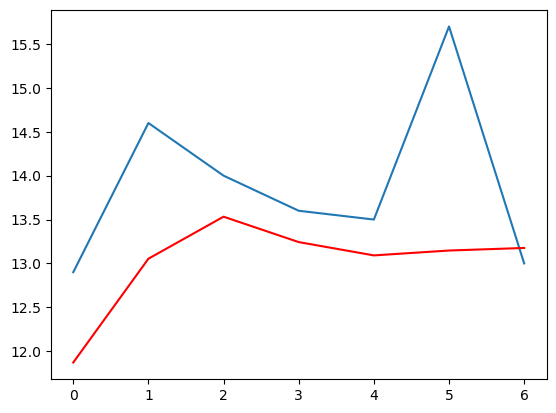

In [26]:
#AUTOREGRESSION MODEL
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
X = df.values
train, test = X[1:len(X)-7], X[len(X)-7:]

lags=29
model = AutoReg(train,lags=29)
model_fit = model.fit()
print('Lag(k_ar): %s' % lags)
print('Coefficients: %s' % model_fit.params)
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()



predicted=11.871275, expected=12.900000
predicted=13.659297, expected=14.600000
predicted=14.349246, expected=14.000000
predicted=13.427454, expected=13.600000
predicted=13.374877, expected=13.500000
predicted=13.479991, expected=15.700000
predicted=14.765146, expected=13.000000
Test RMSE: 1.204


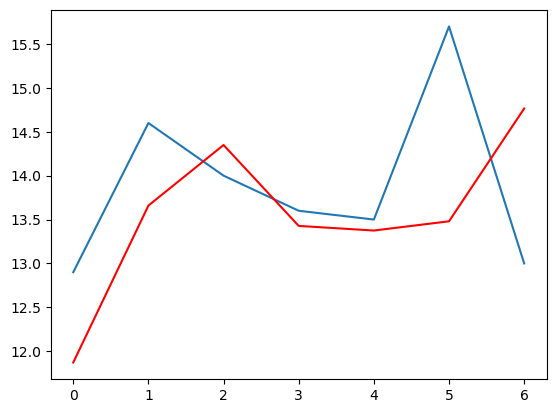

In [34]:
lags = 29

model = AutoReg(train, lags=lags)
model_fit = model.fit()


num_lags = len(model_fit.params) - 1

window = num_lags 
coef = model_fit.params
history = list(train)  
predictions = list()

for t in range(len(test)):
    length = len(history)
    lag = [history[i] for i in range(length - window, length)]
    y = coef[0]
    for d in range(window):
        y += coef[d + 1] * lag[window - d - 1]
    obs = test[t]
    predictions.append(y)
    history.append(obs)
    print('predicted=%f, expected=%f' % (y, obs))

rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

plt.plot(test)
plt.plot(predictions, color='red')
plt.show()
